In [119]:

import pandas as pd
from IPython.display import display
red_wine = pd.read_csv('/Users/mugilrajark/Downloads/red-wine.csv')

#creating training an validation splits 
df_train=red_wine.sample(frac=0.7, random_state = 0)
df_valid= red_wine.drop(df_train.index)
display(df_train.head(4))

#scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ -min_)
df_valid = (df_valid - min_) / (max_ -min_)

#split features and targets
X_train = df_train.drop('quality', axis =1)
X_valid = df_valid.drop('quality', axis =1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [120]:
print(X_train.shape)

(1119, 11)


In [121]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [122]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [123]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 28ms/step - loss: 0.2811 - val_loss: 0.1305
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1395 - val_loss: 0.1205
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1324 - val_loss: 0.1167
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1228 - val_loss: 0.1106
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1137 - val_loss: 0.1070
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1102 - val_loss: 0.1042
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1073 - val_loss: 0.1060
Epoch 8/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1048 - val_loss: 0.1017
Epoch 9/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1047 - val_loss: 0.1081
Epoch 10/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1018 - val_loss: 0.1010


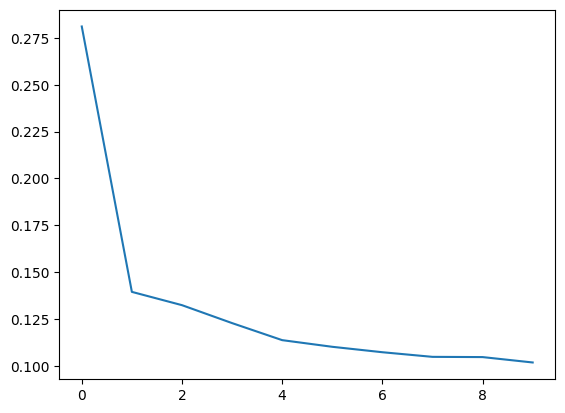

In [127]:
import pandas as pd 

history_df = pd.DataFrame(history.history)
history_df['loss'].plot();